In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [2]:
class Quadstate(TypedDict):
  a:int 
  b:int
  c:int

  equation:str
  disctriminant:float
  result:str

In [4]:
def show_equation(state:Quadstate):
  equation = f"{state['a']}x^2 + {state['b']}x + {state['c']} = 0"
  state['equation'] = equation
  return state

In [5]:
def calculate_discriminant(state:Quadstate):
  disctimant= state['b']**2 - 4*state['a']*state['c']
  state['disctriminant'] = disctimant
  return state

In [6]:
def real_roots(state:Quadstate):
  root1= (-state['b'] + state['disctriminant']**0.5) / (2*state['a'])
  root2= (-state['b'] - state['disctriminant']**0.5) / (2*state['a'])

  result = f"Real roots: {root1} and {root2}"
  state['result'] = result
  return state

In [7]:
def repated_roots(state:Quadstate):
  root= -state['b'] / (2*state['a'])
  result = f"Repeated root: {root}"
  state['result'] = result
  return state

In [8]:
def no_real_roots(state:Quadstate):
  result = "No real roots"
  state['result'] = result
  return state

In [9]:
def check_chondtion(
    state: Quadstate,
) -> Literal["real_roots", "repated_roots", "no_real_roots"]:
  if state["disctriminant"] > 0:
    return "real_roots"
  elif state["disctriminant"] == 0:
    # Must match the node name added in cell 8: "repated_roots"
    return "repated_roots"
  else:
    return "no_real_roots"

In [10]:
graph= StateGraph(Quadstate)

graph.add_node("show_equation", show_equation)
graph.add_node("calculate_discriminant", calculate_discriminant)
graph.add_node("real_roots", real_roots)
graph.add_node("repated_roots", repated_roots)
graph.add_node("no_real_roots", no_real_roots)


graph.add_edge(START, "show_equation")
graph.add_edge("show_equation", "calculate_discriminant")

graph.add_conditional_edges(
	"calculate_discriminant",
	check_chondtion,
	{
		"real_roots": "real_roots",
		"repated_roots": "repated_roots",
		"no_real_roots": "no_real_roots",
	},
)
graph.add_edge("real_roots", END)
graph.add_edge("repated_roots", END)
graph.add_edge("no_real_roots", END)

workflow= graph.compile()


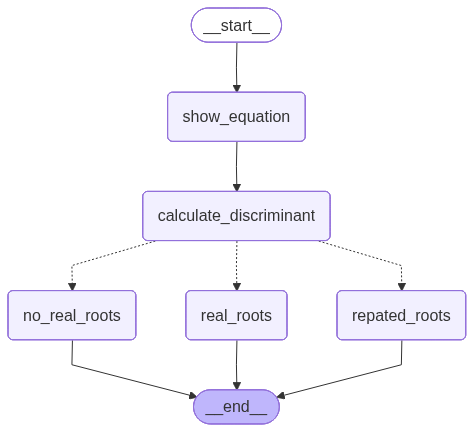

In [11]:
workflow

In [14]:
initial_state: Quadstate = {
  "a": 10,
  "b": -3,
  "c": 2,
  "equation": "",
  "disctriminant": 0.0,
  "result": "",
}

result = workflow.invoke(initial_state)
result

{'a': 10,
 'b': -3,
 'c': 2,
 'equation': '10x^2 + -3x + 2 = 0',
 'disctriminant': -71,
 'result': 'No real roots'}